### Logistic Regression with 6-degree Polynomials
#### 1 Layer network

### MODEL NUMBER 1

In [1]:
from engine.draw import *
from engine.grad import *
from engine.neuralnet import *

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.loadtxt('data/ex2data1.txt', delimiter=',')
#ran = np.random.randint(0, 101, 50)
x = data[:,:2]
y = data[:,2]
print(x[:5], '->>', y[:5])

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]] ->> [0. 0. 0. 1. 1.]


In [4]:
def scale(x):
    meu1 = np.max(x[:,0])
    meu2 = np.max(x[:,1])   
    x[:,0] /= meu1
    x[:,1] /= meu2
scale(x)

In [5]:
def plot_data(x, y):
    positives = y == 1
    negatives = y == 0
    plt.plot(x[positives, 0], x[positives, 1], 'r+', label = 'Accepted')
    plt.plot(x[negatives, 0], x[negatives, 1], 'bo', label = 'Rejected')
    plt.legend(loc = 'upper right')

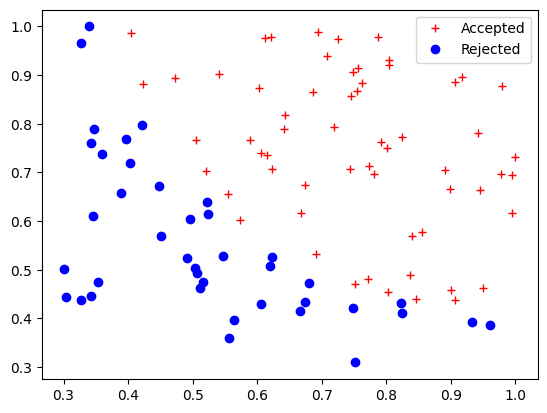

In [11]:
plot_data(x, y)
plt.show()

In [12]:
def map_features(X1, X2):
    # feature mapping to polynomials for polynomial regression
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)
x_map = map_features(x[:,0], x[:,1])

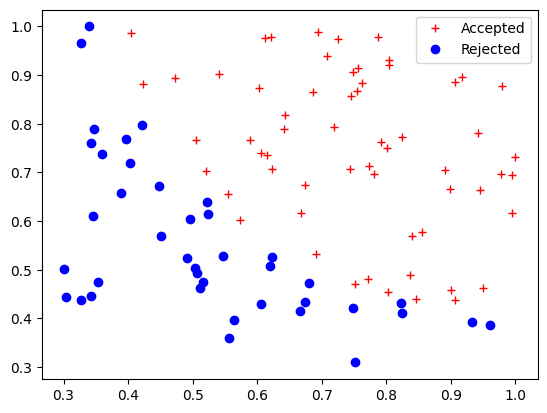

In [13]:
plot_data(x_map, y) # becuz still we have map_x[0] = x[0], map_x[1] = x[1]
plt.show()

### NEURON
### MLP(no. of inputs, [list of neurons per layer], [list of corresponding activations])

In [14]:
N = MLP(x_map.shape[1], [1], ['sigmoid'])

In [15]:
N.fit(x_map, y, iters = 2000, alpha = 0.1)

Iteration 1: loss = 25.385989237259313
Iteration 101: loss = 5.809243639961431
Iteration 201: loss = 4.507724801962549
Iteration 301: loss = 3.848682116702453
Iteration 401: loss = 3.424666784020992
Iteration 501: loss = 3.120683133528085
Iteration 601: loss = 2.8885272517787675
Iteration 701: loss = 2.703594822726206
Iteration 801: loss = 2.5517389238198813
Iteration 901: loss = 2.42414024507413
Iteration 1001: loss = 2.314966013724056
Iteration 1101: loss = 2.220179578077795
Iteration 1201: loss = 2.136884688602863
Iteration 1301: loss = 2.0629412126851223
Iteration 1401: loss = 1.9967284531679164
Iteration 1501: loss = 1.936993299543571
Iteration 1601: loss = 1.8827494115612127
Iteration 1701: loss = 1.8332083029316324
Iteration 1801: loss = 1.7877310298268685
Iteration 1901: loss = 1.7457935709975692
Iteration 2000: loss = 1.7073357274673564


In [16]:
def plot_decision_boundary(w, b, X, y):
    def sig(z): 
        return 1/(1+np.exp(-z))
    # Credits to dibgerge on Github for this plotting code
    arr = []
    for W in w:
        arr.append(W.data)
    b = b.data
    w = np.array(arr)

    pad = 0.05
    plt.xlim(min(X[:,0]) - pad,max(X[:,0]) + pad)
    plt.ylim(min(X[:,1]) - pad,max(X[:,1]) + pad)
    
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="g")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_features(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0
        plt.contour(u,v,z, levels = [0.5], colors="g")

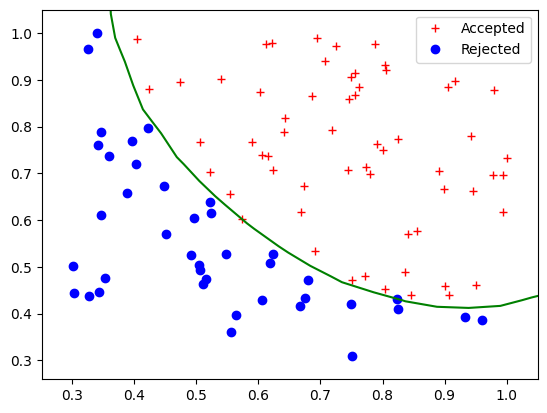

In [17]:
import warnings
warnings.filterwarnings('ignore')
plot_decision_boundary(N.layers[-1].neurons[0].w, N.layers[-1].neurons[0].b.data, x_map, y)

# ----

### MODEL NUMBER 2

In [18]:
data = np.loadtxt('data/ex2data2.txt', delimiter=',')
#ran = np.random.randint(0, 101, 50)
x = data[:,:2]
y = data[:,2]
print(x[:5], '->>', y[:5])

[[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]] ->> [1. 1. 1. 1. 1.]


In [19]:
scale(x)

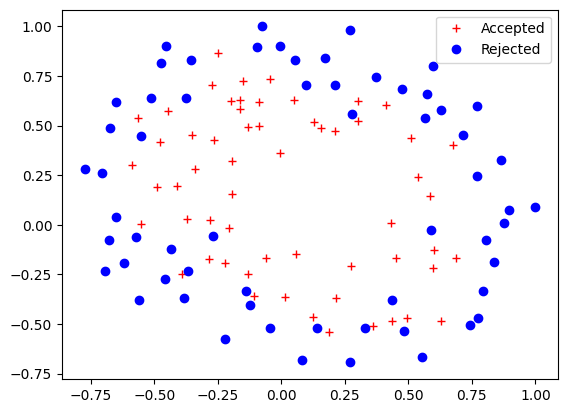

In [20]:
plot_data(x, y)
plt.show()

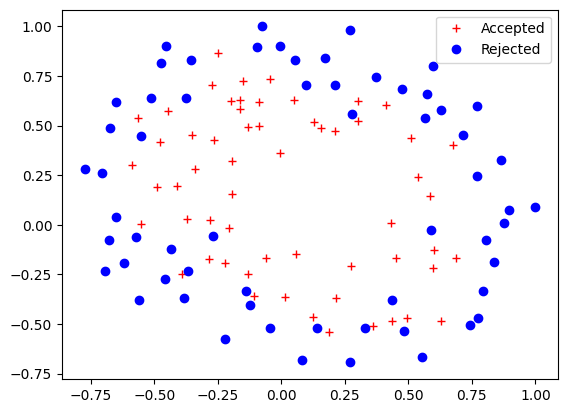

In [21]:
x_map = map_features(x[:,0], x[:,1])
plot_data(x_map, y) # becuz still we have map_x[0] = x[0], map_x[1] = x[1]
plt.show()

In [24]:
N = MLP(x_map.shape[1], [1], ['sigmoid'])
N.fit(x_map, y, iters = 4000, alpha = 0.1)

Iteration 1: loss = 32.912367940467895
Iteration 101: loss = 13.876220018763364
Iteration 201: loss = 13.143890593173026
Iteration 301: loss = 12.879676336517743
Iteration 401: loss = 12.734042253250108
Iteration 501: loss = 12.636836480464021
Iteration 601: loss = 12.564506718695663
Iteration 701: loss = 12.506653965977883
Iteration 801: loss = 12.457799322942616
Iteration 901: loss = 12.414655786455148
Iteration 1001: loss = 12.375036852239381
Iteration 1101: loss = 12.337382043985905
Iteration 1201: loss = 12.300586930909013
Iteration 1301: loss = 12.264028279385153
Iteration 1401: loss = 12.22767363911757
Iteration 1501: loss = 12.192060617661099
Iteration 1601: loss = 12.15798013985044
Iteration 1701: loss = 12.12604472788208
Iteration 1801: loss = 12.096486895332433
Iteration 1901: loss = 12.069235506525771
Iteration 2001: loss = 12.044077565175753
Iteration 2101: loss = 12.0207716306268
Iteration 2201: loss = 11.99909700490849
Iteration 2301: loss = 11.978865677088224
Iteration 

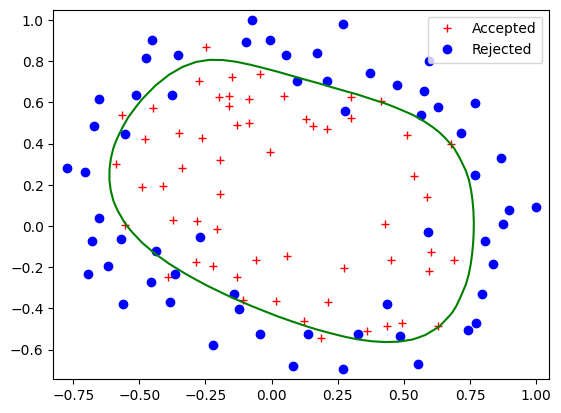

In [25]:
plot_decision_boundary(N.layers[-1].neurons[0].w, N.layers[-1].neurons[0].b.data, x_map, y)